Dataset preparation

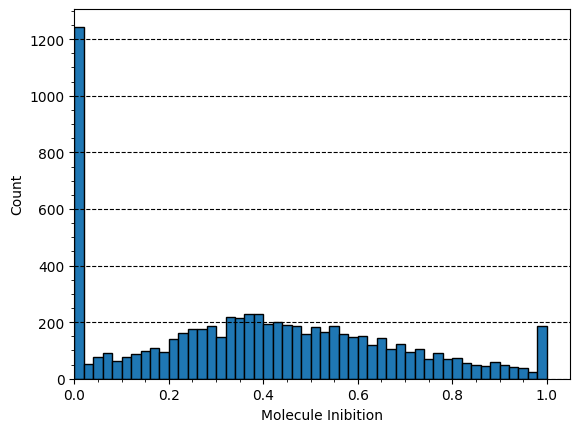

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report,explained_variance_score, mean_squared_error, max_error, mean_absolute_error,precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix,accuracy_score
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import seaborn as sn
import pickle
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
def regstats(y_test,preds):
    print("The RVE is: ", explained_variance_score(y_test, preds))
    print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
    corr, pval=pearsonr(y_test, preds)
    print("The Correlation Score is is: %7.4f (p-value=%e)"%(corr,pval))
    print("The Maximum Error is is: ", max_error(y_test, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))
plt.hist(y_train,bins=50,edgecolor='black')
plt.xlabel("Molecule Inibition")
plt.ylabel("Count")
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(axis="y",color='black',linestyle='--')
plt.show()

Data Set Visualizing and Scaling

In [2]:
df=pd.DataFrame(X_train,columns=col_names)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(X_train),columns=col_names)
#df['Ycolumn']=pd.DataFrame(y_train)
df



,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,0.111788,0.111793,0.098901,0.021277,0.058394,0.023810,0.172414,0.117188,0.110236,0.097826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.080117,0.080145,0.043956,0.021277,0.065693,0.023810,0.068966,0.078125,0.080709,0.054348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058648,0.058656,0.032967,0.000000,0.021898,0.000000,0.051724,0.062500,0.061024,0.032609,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.363449,0.363485,0.285714,0.404255,0.167883,0.404762,0.275862,0.371094,0.368110,0.293478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.069372,0.069503,0.032967,0.000000,0.029197,0.000000,0.068966,0.066406,0.061024,0.054348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,0.091387,0.091402,0.054945,0.000000,0.043796,0.000000,0.086207,0.085938,0.072835,0.097826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,0.028921,0.028928,0.010989,0.000000,0.021898,0.000000,0.034483,0.031250,0.037402,0.010870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,0.103267,0.103308,0.032967,0.000000,0.072993,0.000000,0.068966,0.105469,0.118110,0.043478,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,0.071033,0.071062,0.032967,0.042553,0.036496,0.023810,0.086207,0.070312,0.070866,0.043478,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

Correlation

In [75]:
def naif_model_testingR(X_train, X_test, y_train, y_test):
    #test 3 approaches and print out the results
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)

    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(X_train, y_train)

    lmr=LinearRegression()
    lmr.fit(X_train, y_train)

    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)

    print("RVE RFs: %7.4f" % explained_variance_score(y_test, rf_preds))
    print("RVE DTs: %7.4f" % explained_variance_score(y_test, dt_preds))
    print("RVE LRs: %7.4f" % explained_variance_score(y_test, lr_preds))
X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(X_train,y_train, test_size=0.2, random_state=1102)
naif_model_testingR(X_TRAIN,X_TEST,y_TRAIN,y_TEST)

RVE RFs:  0.6219
RVE DTs:  0.2497
RVE LRs:  0.3925


In [76]:
N,M=X_TRAIN.shape
N,M
v=np.hstack((y_TRAIN.reshape((N,1)), X_TRAIN))
pd.DataFrame(v)
l=pd.DataFrame(np.corrcoef(v.T))
z=l[(l[0]>=0.008) | (l[0]<=-0.008)][0]
k=z.index.to_list()
k.pop(0)
modified_k = [x - 1 for x in k]

In [77]:
print("The features selected are columns: ", modified_k)
nX_train = X_TRAIN[:,modified_k]
nX_test  = X_TEST[:,modified_k]

naif_model_testingR(nX_train, nX_test,y_TRAIN,y_TEST)

The features selected are columns:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 190, 192, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 222, 223, 224, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 2

Random Forest

In [6]:
rf = RandomForestRegressor(random_state=0, 
                             criterion='squared_error') 

rf.fit(X_TRAIN, y_TRAIN)

RandomForestRegressor(random_state=0)

In [7]:
df_col_names=pd.DataFrame(col_names,columns=['Feature'])
df_col_names['Importance']=rf.feature_importances_
df_col_names_sorted=df_col_names.sort_values(by='Importance', ascending=False,ignore_index=True)
x=df_col_names_sorted['Feature'][0:770].values.tolist()

In [12]:
for i in np.arange(700,1000,35):
    x=df_col_names_sorted['Feature'][0:i].values.tolist()
    X_TRAIN, X_TEST, y_TRAIN, y_TEST = train_test_split(df[x].values,y_train, test_size=0.2, random_state=1102)
    rmse=[]
    ind=[]
    ridge = LinearRegression().fit(X_TRAIN, y_TRAIN)
    preds3=ridge.predict(X_TEST)
    rmse.append(mean_squared_error(y_TEST, preds3, squared=False))
    print(i,min(rmse))

700 0.18958844934772212
735 0.18889732191565675
770 0.18779591560399347
805 0.1891452158470005
840 0.18896062539894626
875 0.1890377080046622
910 0.18910220385749268
945 0.1896099458734691
980 0.18994466379611885


PCA

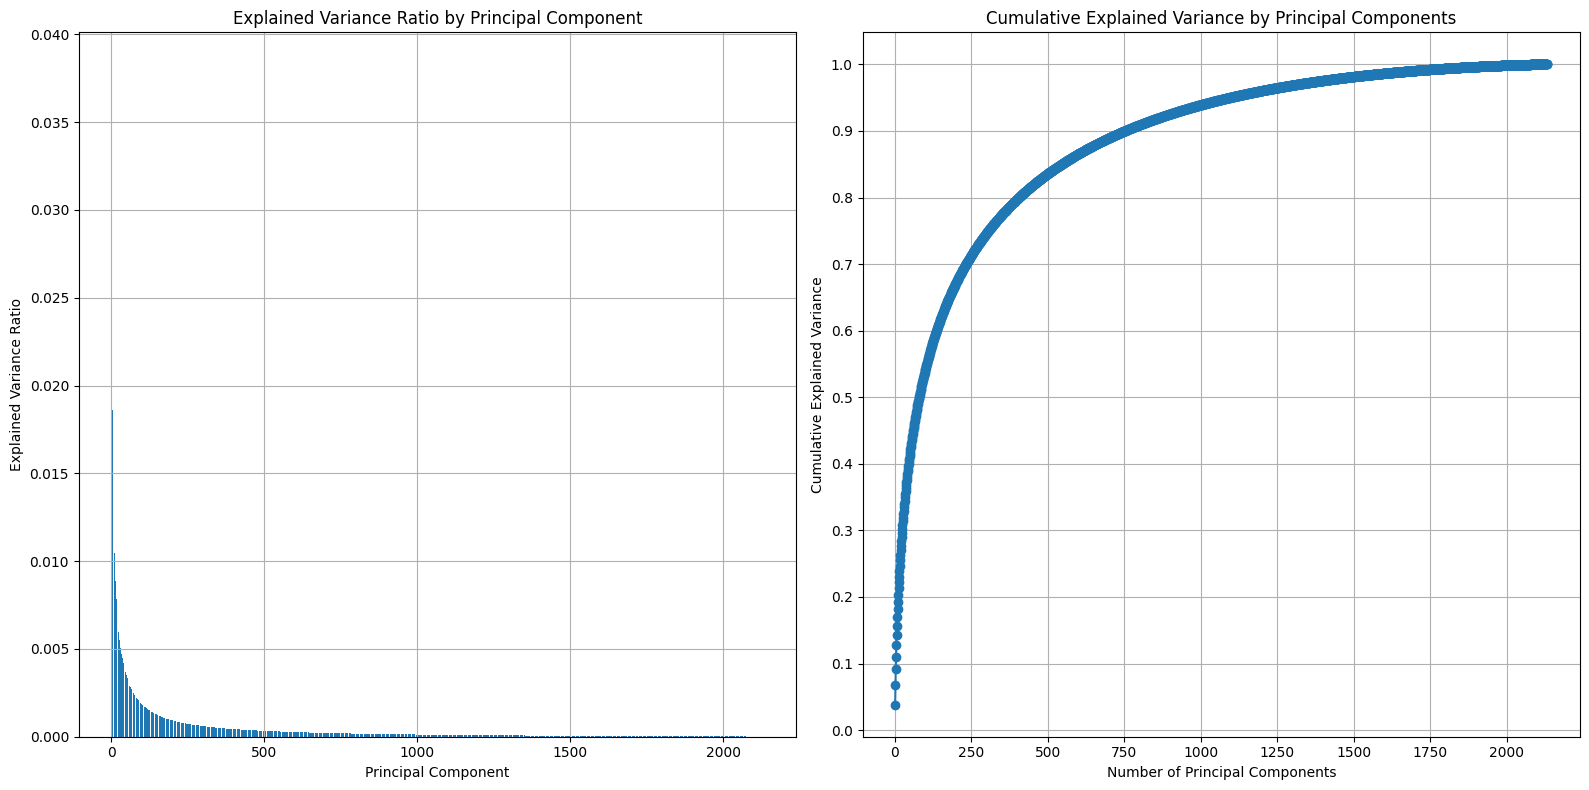

In [23]:
from sklearn.decomposition import PCA
import matplotlib.ticker as ticker


X = df.values

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")
ax1.grid()

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=250))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
ax2.grid()
# Display the figure
plt.tight_layout()
plt.show()

Model Pre-Selection Pycaret


In [93]:
from pycaret.regression import setup,compare_models,evaluate_model,predict_model,save_model,load_model
from pycaret.regression import *

In [96]:
newdf=df[x]
newdf['Ycolumn']=pd.DataFrame(y_train)

In [ ]:
s=setup(newdf,target='Ycolumn',session_id = 120)
models()
get_metrics()
remove_metric('mse')
remove_metric('rmsle')
get_metrics()
best = compare_models(budget_time=3,turbo=True)


,Description,Value
0,Session id,120
1,Target,Ycolumn
2,Target type,Regression
3,Original data shape,"(7337, 771)"
4,Transformed data shape,"(7337, 771)"
5,Transformed train set shape,"(5135, 771)"
6,Transformed test set shape,"(2202, 771)"
7,Numeric features,770
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,RMSE,R2,MAPE,TT (Sec)
rf,Random Forest Regressor,0.1259,0.1668,0.6375,0.5917,11.8530
knn,K Neighbors Regressor,0.1243,0.1696,0.6255,0.5348,0.1390
br,Bayesian Ridge,0.1435,0.1848,0.5554,0.6387,0.2980
ridge,Ridge Regression,0.1475,0.1898,0.5308,0.6885,0.0820
lr,Linear Regression,0.1485,0.1912,0.5235,0.7053,0.8540
huber,Huber Regressor,0.1482,0.1937,0.5116,0.6560,2.9080
omp,Orthogonal Matching Pursuit,0.1681,0.2143,0.4025,0.7801,0.0830
par,Passive Aggressive Regressor,0.1742,0.2214,0.3603,0.7462,0.1040
lar,Least Angle Regression,0.1855,0.2392,0.2505,0.8731,0.2380
dt,Decision Tree Regressor,0.1658,0.2407,0.2434,0.7242,0.2850


# Functions for Kfold testing, IVS testing and Plotting 

In [8]:
x=df_col_names_sorted['Feature'][0:770].values.tolist()
X_TRAIN, X_IVS, y_TRAIN, y_IVS = train_test_split(df[x].values,y_train, test_size=0.2, random_state=1102)
def kfold (model):
    kf = KFold(n_splits=5, shuffle=True)
    TRUTH=None
    PREDS=None
    for train_index, test_index in kf.split(X_TRAIN):
        X_Train, X_Test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_Train, y_Test = y_TRAIN[train_index], y_TRAIN[test_index]
        mdl = model
        mdl.fit(X_Train, y_Train)
        preds1 = mdl.predict(X_Test)
        preds=np.clip(preds1,0,1)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_Test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_Test))
    plt.figure(figsize=(7,7))
    plt.scatter(PREDS, TRUTH)
    plt.grid()
    plt.plot([0, 1], [0, 1], c="r")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    return regstats(TRUTH,PREDS)
def ivs_test(model):
    mdl = model.fit(X_TRAIN, y_TRAIN) 
    ivs_preds1 = mdl.predict(X_IVS)
    ivs_preds=np.clip(ivs_preds1,0,1)
    plt.figure(figsize=(7,7))
    plt.scatter(ivs_preds, y_IVS)
    plt.grid()
    plt.plot([0, 1], [0, 1], c="r")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    return regstats(y_IVS, ivs_preds)

# Stats and prediction visualization for chosed models

Linear Regression

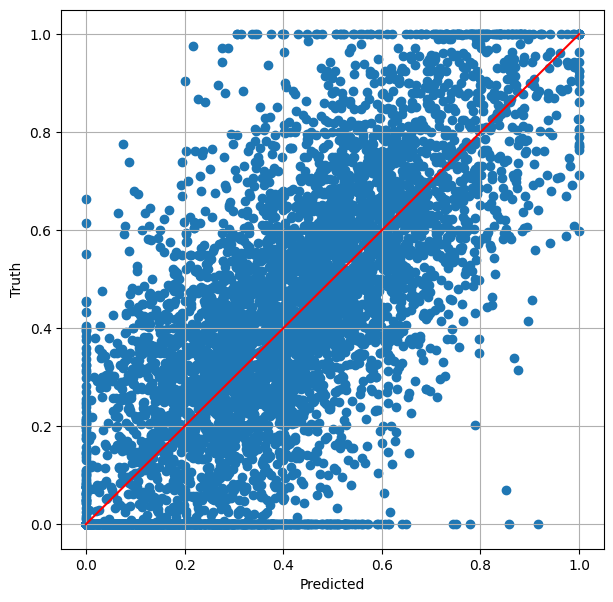

The RVE is:  0.5217582235030224
The rmse is:  0.19173348386019837
The Correlation Score is is:  0.7277 (p-value=0.000000e+00)
The Maximum Error is is:  0.9156887421108193
The Mean Absolute Error is:  0.14613554684423907


In [14]:
kfold(LinearRegression())


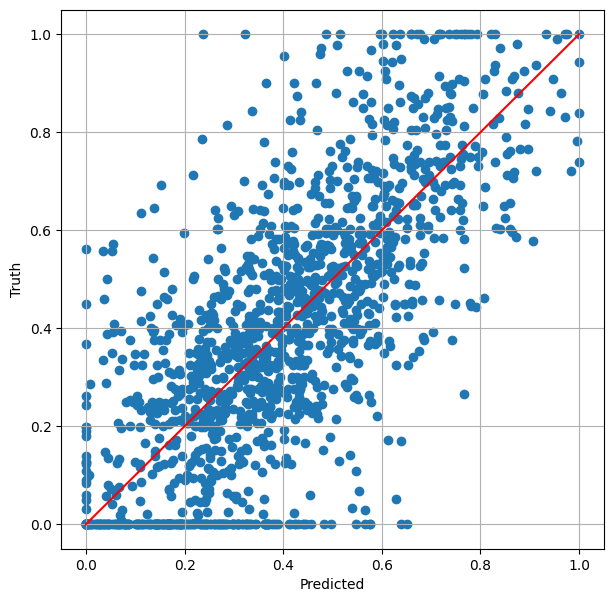

The RVE is:  0.5384856233041891
The rmse is:  0.18628954595921446
The Correlation Score is is:  0.7364 (p-value=4.458272e-251)
The Maximum Error is is:  0.7618288364000545
The Mean Absolute Error is:  0.14197575160824874


In [21]:
ivs_test(LinearRegression())

Decision Tree

best max_depth: 32.0000
best min_samples_split: 52.00
best min_samples_leaf: 6.00


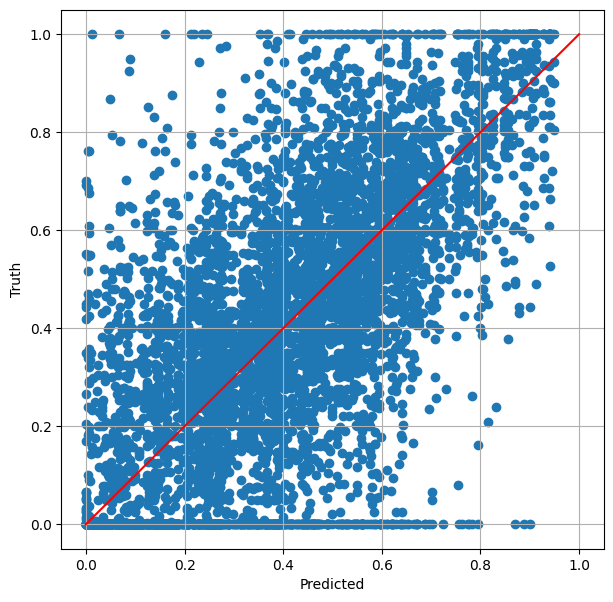

The RVE is:  0.39666347424682646
The rmse is:  0.21534959552164776
The Correlation Score is is:  0.6473 (p-value=0.000000e+00)
The Maximum Error is is:  0.9873139758717949
The Mean Absolute Error is:  0.1607592722731192


In [35]:
maxd = np.arange(2,150,10)
mins_split= np.arange(2,100,10)
min_s_leaf = np.arange(2,10,2)

param_grid = {"max_depth": maxd, "min_samples_split": mins_split,"min_samples_leaf":min_s_leaf}

dt = DecisionTreeRegressor()
gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring="neg_root_mean_squared_error")
gs=gs.fit(X_TRAIN, y_TRAIN)

print("best max_depth: %7.4f" % gs.best_estimator_.max_depth)
print("best min_samples_split: %3.2f" %  gs.best_estimator_.min_samples_split)
print("best min_samples_leaf: %3.2f" %  gs.best_estimator_.min_samples_leaf)

kfold(tree.DecisionTreeRegressor(max_depth=gs.best_estimator_.max_depth,min_samples_split=gs.best_estimator_.min_samples_split,min_samples_leaf=gs.best_estimator_.min_samples_leaf))

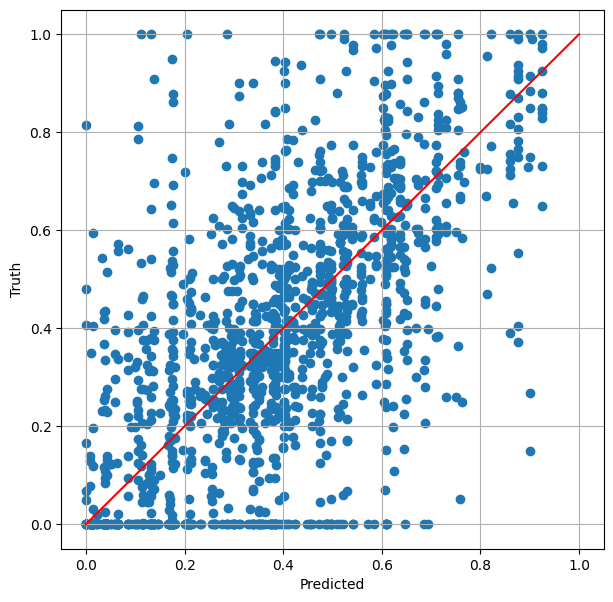

The RVE is:  0.36938483615758
The rmse is:  0.2176296068908117
The Correlation Score is is:  0.6285 (p-value=3.613123e-162)
The Maximum Error is is:  0.889253686
The Mean Absolute Error is:  0.1604628085128981


In [36]:
ivs_test(tree.DecisionTreeRegressor(max_depth=32,min_samples_split=52,min_samples_leaf=6))

Ridge Regression

best alpha: 37.0000


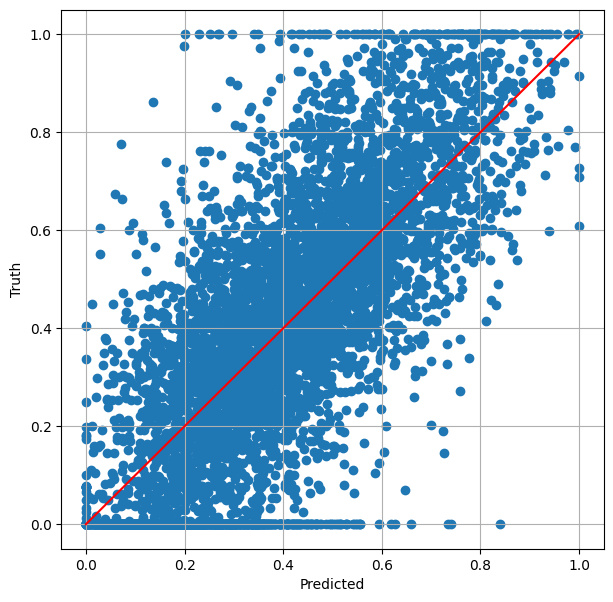

The RVE is:  0.554489932077433
The rmse is:  0.18504831432419802
The Correlation Score is is:  0.7448 (p-value=0.000000e+00)
The Maximum Error is is:  0.8385786308590174
The Mean Absolute Error is:  0.14322980005364536


In [38]:

alph = np.arange(1,100,2)

param_grid = {"alpha": alph}

ri = Ridge()
gs = GridSearchCV(estimator=ri, param_grid=param_grid, scoring="neg_root_mean_squared_error")
gs=gs.fit(X_TRAIN, y_TRAIN)

print("best alpha: %7.4f" % gs.best_estimator_.alpha)

kfold(Ridge(alpha=gs.best_estimator_.alpha))

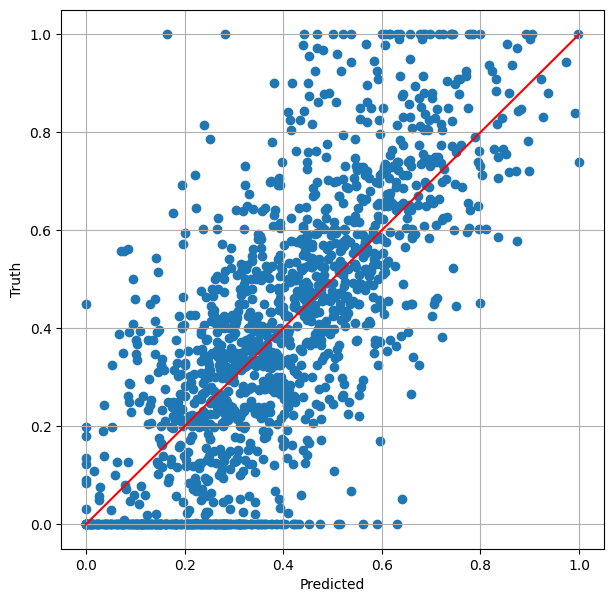

The RVE is:  0.5524629995102448
The rmse is:  0.18336506728108953
The Correlation Score is is:  0.7435 (p-value=1.932567e-258)
The Maximum Error is is:  0.8365347889880863
The Mean Absolute Error is:  0.1407814395308455


In [39]:
ivs_test(Ridge(alpha=37, max_iter=9999999))

Random Forest Regression

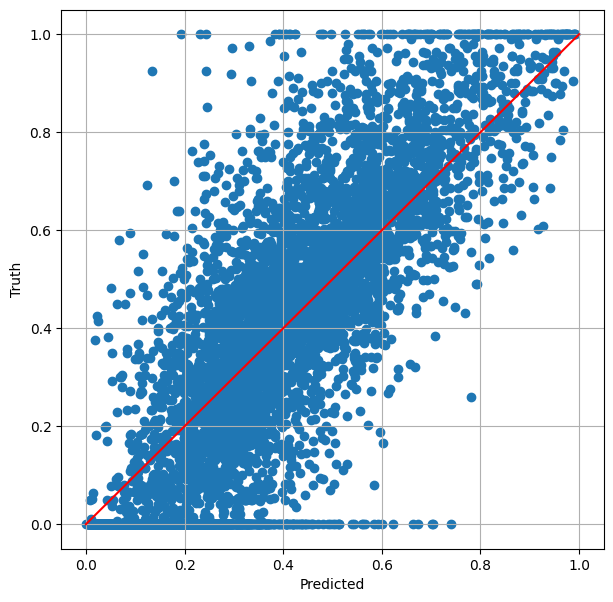

The RVE is:  0.6295369460666971
The rmse is:  0.168762959868811
The Correlation Score is is:  0.7976 (p-value=0.000000e+00)
The Maximum Error is is:  0.8073555119650992
The Mean Absolute Error is:  0.1270417321014586


In [36]:
kfold(RandomForestRegressor(n_estimators=120,min_samples_split=4,max_features=400,random_state=0))

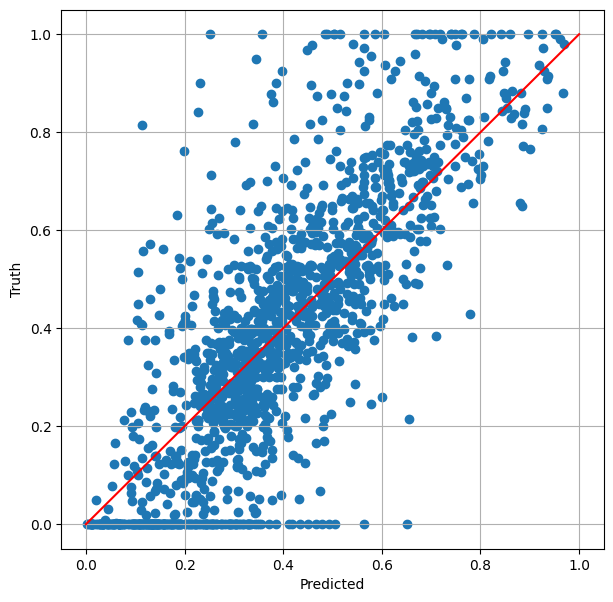

The RVE is:  0.6341073577219338
The rmse is:  0.1657755139649431
The Correlation Score is is:  0.8010 (p-value=0.000000e+00)
The Maximum Error is is:  0.7484117272744445
The Mean Absolute Error is:  0.12238987049245828


In [41]:
ivs_test(RandomForestRegressor(n_estimators=120,min_samples_split=4,max_features=400,random_state=0))

KNN Regressor

best n_neighbors:  5.0000
best leaf:  1.0000


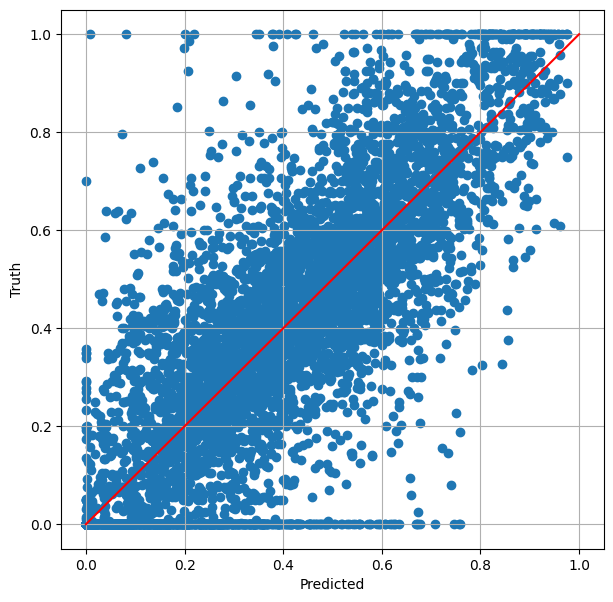

The RVE is:  0.6180337670907652
The rmse is:  0.1713860613991661
The Correlation Score is is:  0.7875 (p-value=0.000000e+00)
The Maximum Error is is:  0.9925629174
The Mean Absolute Error is:  0.12395138153024365


In [47]:

neighbors = np.arange(2,8,1)
leaf=np.arange(1,10,1)

param_grid = {"n_neighbors": alph,"leaf_size":leaf}

ri = KNeighborsRegressor()
gs = GridSearchCV(estimator=ri, param_grid=param_grid, scoring="neg_root_mean_squared_error")
gs=gs.fit(X_TRAIN, y_TRAIN)

print("best n_neighbors: %7.4f" % gs.best_estimator_.n_neighbors)
print("best leaf: %7.4f" % gs.best_estimator_.leaf_size)

kfold(KNeighborsRegressor(n_neighbors=gs.best_estimator_.n_neighbors,n_jobs=-1,leaf_size=gs.best_estimator_.leaf_size))

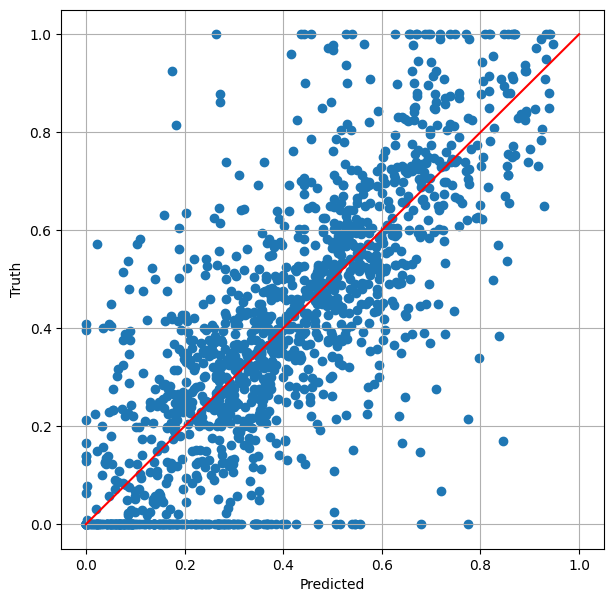

The RVE is:  0.6174840808791544
The rmse is:  0.16950647327036944
The Correlation Score is is:  0.7875 (p-value=1.939971e-310)
The Maximum Error is is:  0.7747581144
The Mean Absolute Error is:  0.12168911088910084


In [48]:
ivs_test(KNeighborsRegressor(n_neighbors=5,n_jobs=-1,leaf_size=1))

# True X_ivs prediction with best model

In [49]:
mdl = RandomForestRegressor(n_estimators=120,min_samples_split=4,max_features=400,random_state=0).fit(X_train, y_train) 
ivs_preds1 = mdl.predict(X_ivs)
X_ivs_preds=np.clip(ivs_preds1,0,1)

KeyboardInterrupt: 

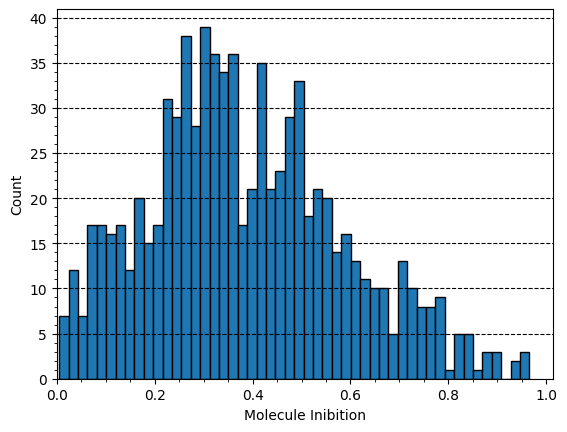

In [54]:
plt.hist(X_ivs_preds,bins=50,edgecolor='black')
plt.xlabel("Molecule Inibition")
plt.ylabel("Count")
plt.xlim(left=0)
plt.minorticks_on()
plt.grid(axis="y",color='black',linestyle='--')
plt.show()

In [55]:
x=pd.DataFrame(X_ivs_preds)
x.to_csv('43.txt', index=False)